## Problem Statement
You are given the 'Portuguese Bank' marketing dataset which contains data about a telemarketing campaign run by the bank to sell a product (term deposit - a type of investment product).

Each row represents a 'prospect' to whom phone calls were made to sell the product. There are various attributes describing the prospects, such as age, profession, education level, previous loans taken by the person etc. Finally, the target variable is 'y'.

As an analyst, you want to predict whether a person will purchase the product or not. This will help the bank reduce their marketing costs since one can then target only the prospects who are likely to buy.

- Build a decision tree with default hyperparameters to predict whether a person will buy the product or not. 

- Find the optimal value of the hyperparameter max_depth usingGridSearchCV(), and then build a model using the optimal value of max_depth to predict whether a given prospect will buy the product. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# display all columns
pd.set_option('display.max_columns', None)

In [3]:
# load data
bank = pd.read_csv('bank-additional.csv', sep=';')

In [4]:
# display top 5 rows
bank.head()

age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  duration  campaign  pdays  previous  \
0   cellular   may         fri       487         2    999         0   
1  telephone   may         fri       346         4    999         0   
2  telephone   jun         wed       227         1    999         0   
3  telephone   jun         fri        17         3    999         0   
4   cellular   nov         mon        58         1    999         0   

      poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0  nonexistent          -1.8          92.893          -46.2      1.313   
1  nonexistent           1.1          93.994          -36.4      4.855   
2  nonexistent           1.4          94.465          -41.8      4.962   
3  nonexistent           1.4          94.465          -41.8      4.959   
4  nonexistent          -0.1          93.200          -42.0      4.191   

   nr.employed   y  
0       5099.1  no  
1       5191.0  no  
2       5228.1  no  
3       5228.1  no  
4       5195.8  no

In [5]:
# no of rows and columns
bank.shape

(4119, 21)

In [6]:
# dataframe information
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

- No NULL values

### Data Preparation

*Convert all string categorical datatypes to int*

In [7]:
# check all object datatype columns
col = bank.select_dtypes(include='object').columns
col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [8]:
# check the value_counts()
for i in col:
    print(bank[i].value_counts())
    print('='*70)

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64
married     2509
single      1153
divorced     446
unknown       11
Name: marital, dtype: int64
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: education, dtype: int64
no         3315
unknown     803
yes           1
Name: default, dtype: int64
yes        2175
no         1839
unknown     105
Name: housing, dtype: int64
no         3349
yes         665
unknown     105
Name: loan, dtype: int64
cellular     2652
telephone    1467
Name: contact, dtype: int64
may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
o

To convert them to numeric we will use sklearn's LabelEncoder

In [9]:
# import package
from sklearn.preprocessing import LabelEncoder

# create object
le = LabelEncoder()

In [10]:
# running loop to convert each feature
for i in col:
    
    ## Using .fit_transform function to fit label
    # encoder and return encoded label 
    label = le.fit_transform(bank[i])  
    
    # removing the column from df
    # as it is of no use now.
    bank.drop(i, axis=1, inplace=True)
    
    # Appending the array to our dataFrame
    bank[i] = label
    
bank.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   30       487         2    999         0          -1.8          92.893   
1   39       346         4    999         0           1.1          93.994   
2   25       227         1    999         0           1.4          94.465   
3   38        17         3    999         0           1.4          94.465   
4   47        58         1    999         0          -0.1          93.200   

   cons.conf.idx  euribor3m  nr.employed  job  marital  education  default  \
0          -46.2      1.313       5099.1    1        1          2        0   
1          -36.4      4.855       5191.0    7        2          3        0   
2          -41.8      4.962       5228.1    7        1          3        0   
3          -41.8      4.959       5228.1    7        1          2        0   
4          -42.0      4.191       5195.8    0        1          6        0   

   housing  loan  contact  month  day_of_week  poutcome  y  
0        2     0        0      6            0         1  0  
1        0     0        1      6            0         1  0  
2        2     0        1      4            4         1  0  
3        1     1        1      4            0         1  0  
4        2     0        0      7            1         1  0

In [11]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   duration        4119 non-null   int64  
 2   campaign        4119 non-null   int64  
 3   pdays           4119 non-null   int64  
 4   previous        4119 non-null   int64  
 5   emp.var.rate    4119 non-null   float64
 6   cons.price.idx  4119 non-null   float64
 7   cons.conf.idx   4119 non-null   float64
 8   euribor3m       4119 non-null   float64
 9   nr.employed     4119 non-null   float64
 10  job             4119 non-null   int32  
 11  marital         4119 non-null   int32  
 12  education       4119 non-null   int32  
 13  default         4119 non-null   int32  
 14  housing         4119 non-null   int32  
 15  loan            4119 non-null   int32  
 16  contact         4119 non-null   int32  
 17  month           4119 non-null   i

#### Split into X and y

In [12]:
# putting feature variables to X
X = bank.drop('y', axis=1)

# putting target variable to y
y = bank.y

In [13]:
X.shape, y.shape

((4119, 20), (4119,))

#### Divide into train and test

In [14]:
# import package
from sklearn.model_selection import train_test_split

# split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

In [15]:
X_train.shape, X_test.shape

((3295, 20), (824, 20))

#### Build Model

In [16]:
# import package
from sklearn.tree import DecisionTreeClassifier

# create object
dt = DecisionTreeClassifier(random_state=42)

# fit the model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# Importing required packages for visualization
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [18]:
# defining func to visualise Decision Tree

def build_tree(dt):
    dot_data = StringIO()
    export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                   feature_names=X.columns, class_names=['Not Purchased','Purchased'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [19]:
# plotting graph with default hyperparameters

graph = build_tree(dt)
Image(graph.create_png())

In [20]:
# Depth of Decision Tree
print(dt.get_depth())

16


#### Evaluation

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [22]:
# defining a func to check evaluation metrics

def evaluate(dt):
    print('Train set')
    print('Accuracy:',accuracy_score(y_train, dt.predict(X_train)))
    print('Confusion matrix: \n', confusion_matrix(y_train, dt.predict(X_train)))
    print('='*50)
    print('Test set')
    print('Accuracy:',accuracy_score(y_test, dt.predict(X_test)))
    print('Confusion matrix: \n', confusion_matrix(y_test, dt.predict(X_test)))

In [23]:
# evaluate
evaluate(dt)

Train set
Accuracy: 1.0
Confusion matrix: 
 [[2936    0]
 [   0  359]]
Test set
Accuracy: 0.8847087378640777
Confusion matrix: 
 [[687  45]
 [ 50  42]]


In [24]:
# creating a df to store actual and predicted values
result_df = pd.DataFrame(y_test).rename(columns={'y':'Actual'})
result_df['Pred_default'] = dt.predict(X_test)
result_df

Actual  Pred_default
889        1             1
2669       0             0
2707       0             0
2258       0             0
2514       1             0
...      ...           ...
2488       1             1
949        0             0
3883       0             0
2059       0             0
3514       0             0

[824 rows x 2 columns]

### Finding optimal max_depth

In [25]:
# import library
from sklearn.model_selection import GridSearchCV

In [26]:
# parameters to build the model on: specify a range of max_depth
param = {'max_depth': range(1,17)}

In [27]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, param_grid=param,
                          cv=5, verbose=2, n_jobs=-1, scoring='accuracy')

# fit the model
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 17)}, scoring='accuracy',
             verbose=2)

In [28]:
# creating a df to check the results
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.010802      0.001323         0.003997        0.000637   
1       0.016600      0.005609         0.005604        0.001960   
2       0.016001      0.001895         0.005800        0.001937   
3       0.016405      0.002332         0.004799        0.001470   
4       0.019997      0.005214         0.004606        0.001360   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}           0.880121           0.895296   
1               2  {'max_depth': 2}           0.908953           0.898331   
2               3  {'max_depth': 3}           0.904401           0.916540   
3               4  {'max_depth': 4}           0.908953           0.915023   
4               5  {'max_depth': 5}           0.908953           0.911988   

   split2_test_score  split3_test_score  split4_test_score  mean_test_score  \
0           0.890744           0.890744           0.890744         0.889530   
1           0.889226           0.896813           0.895296         0.897724   
2           0.892261           0.911988           0.905918         0.906222   
3           0.892261           0.905918           0.907436         0.905918   
4           0.878604           0.905918           0.911988         0.903490   

   std_test_score  rank_test_score  
0        0.005024               15  
1        0.006409                9  
2        0.008222                1  
3        0.007496                2  
4        0.012645                3

In [29]:
score_df.shape

(16, 14)

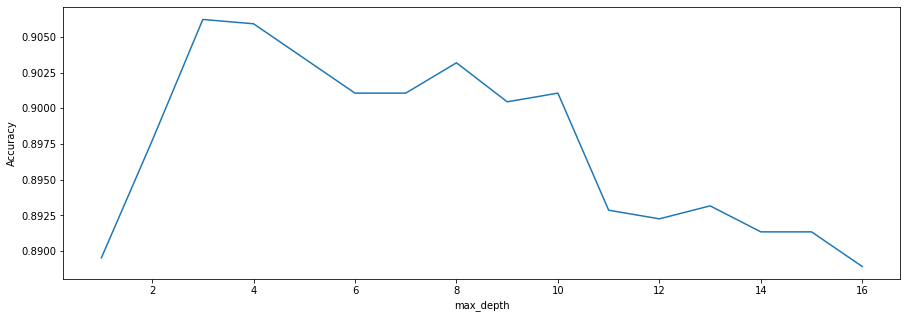

In [30]:
# plotting accuracies with max_depth
plt.figure(figsize=(15,5))
plt.plot(score_df.param_max_depth, score_df.mean_test_score)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.show()

optimal max_depth = 3

In [31]:
# selecting model on best hyperparameter
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=3, random_state=42)

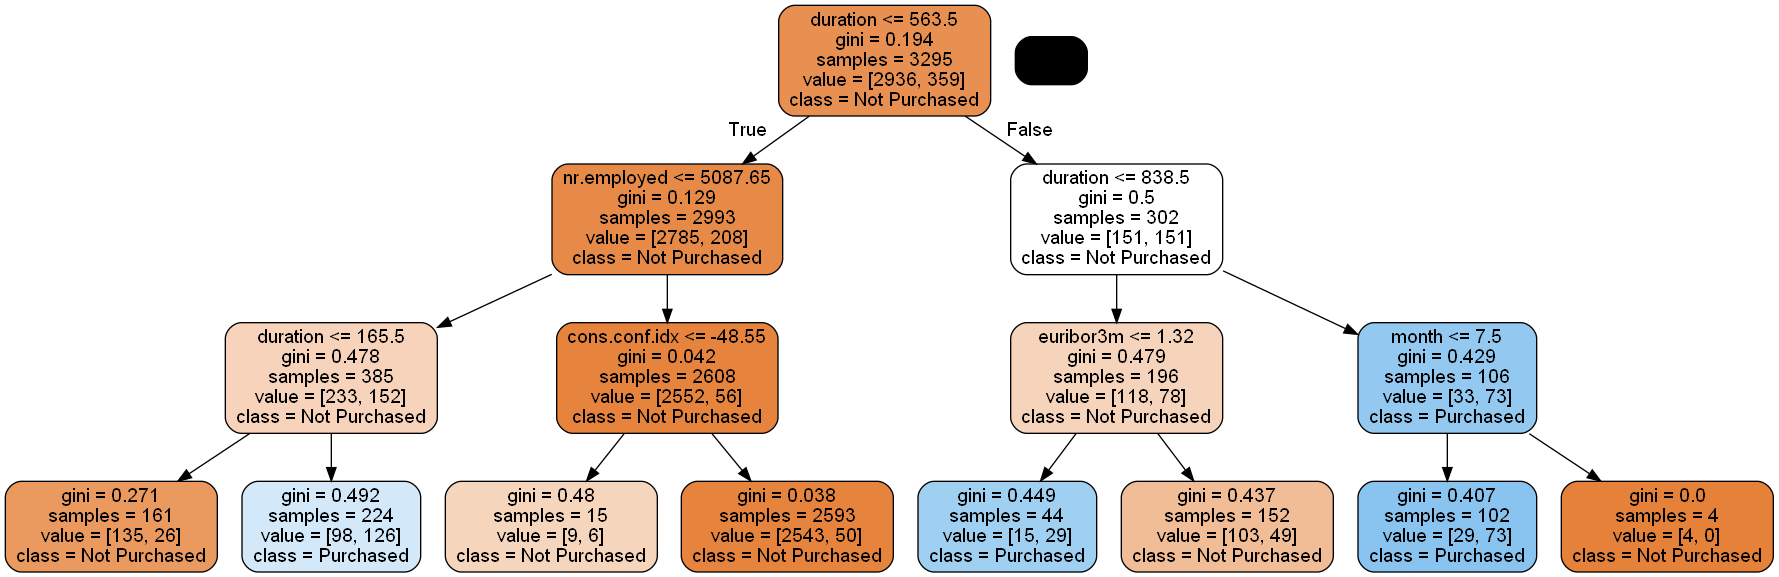

In [32]:
# plot Decision Tree
graph = build_tree(dt_best)
Image(graph.create_png())

In [33]:
# evaluation metrics
evaluate(dt_best)

Train set
Accuracy: 0.9171471927162367
Confusion matrix: 
 [[2794  142]
 [ 131  228]]
Test set
Accuracy: 0.9029126213592233
Confusion matrix: 
 [[685  47]
 [ 33  59]]


In [34]:
# adding column containg new predictions to df 'result_df'
result_df['Pred_tuned'] = dt_best.predict(X_test)
result_df.head()

Actual  Pred_default  Pred_tuned
889        1             1           1
2669       0             0           0
2707       0             0           0
2258       0             0           1
2514       1             0           0